In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set_style("whitegrid")
sns.despine()

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


<Figure size 640x480 with 0 Axes>

-  FFMC (Fine Fuel Moisture Code) là chỉ số độ ẩm nhiên liệu mịn.
- DMC (Duff Moisture Code) là chỉ số độ ẩm không tốt.

In [ ]:
fires = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/fires.csv/fires.csv").drop("Unnamed: 0", axis = 1)
fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,NaN,51.0,6.7,0.0,0.00
1,7,4,oct,tue,90.6,NaN,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,NaN,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,NaN,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


In [ ]:
fires["summer"] = fires["month"].apply(lambda x: 1 if x in ["jun", "jul", "aug"] else 0)

=> Tạo ra cột mới **summer** vì mùa hè là thời điểm lý tưởng để cháy rừng

<Axes: >

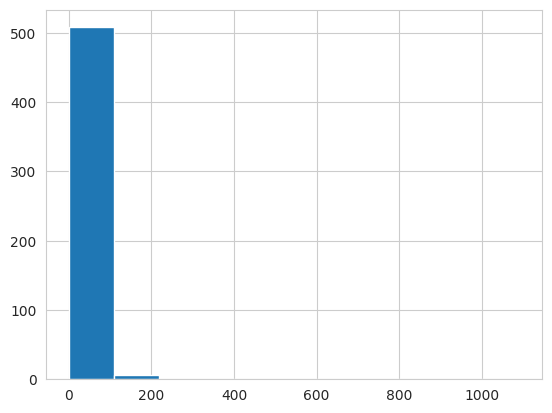

In [ ]:
fires["area"].hist()

In [ ]:
fires["log_area"] = np.log(fires["area"] + 1)

=> Kết quả của chúng ta có độ lệch phải cao với những vụ cháy gây thiệt hại cực kỳ lớn. Hơn nữa, nhiều hàng có giá trị kết quả là 0 hoặc gần 0. Có thể đáng để biến đổi dữ liệu bằng cách lấy log. Tuy nhiên, hãy lưu ý rằng một số kết quả thực tế là 0, vì vậy chúng ta có thể thêm 1 để tránh bất kỳ lỗi nào. Hãy nhớ rằng log(0)
 không xác định. 😊

In [ ]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         517 non-null    int64  
 1   Y         517 non-null    int64  
 2   month     517 non-null    object 
 3   day       517 non-null    object 
 4   FFMC      469 non-null    float64
 5   DMC       496 non-null    float64
 6   DC        474 non-null    float64
 7   ISI       515 non-null    float64
 8   temp      496 non-null    float64
 9   RH        487 non-null    float64
 10  wind      482 non-null    float64
 11  rain      485 non-null    float64
 12  area      517 non-null    float64
 13  summer    517 non-null    int64  
 14  log_area  517 non-null    float64
dtypes: float64(10), int64(3), object(2)
memory usage: 60.7+ KB


In [ ]:
from sklearn.impute import KNNImputer
imp = KNNImputer(missing_values = np.nan, n_neighbors= 3)

fires_missing = fires.drop(["month", "day"], axis = 1)
imputed_fires = pd.DataFrame(imp.fit_transform(fires_missing), columns = fires_missing.columns)

imputed_fires

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,summer,log_area
0,7.0,5.0,86.2,26.200000,94.3,5.1,16.6,51.0,6.700000,0.0,0.00,0.0,0.000000
1,7.0,4.0,90.6,90.266667,669.1,6.7,18.0,33.0,0.900000,0.0,0.00,0.0,0.000000
2,7.0,4.0,90.6,43.700000,275.5,6.7,14.6,33.0,1.300000,0.0,0.00,0.0,0.000000
3,8.0,6.0,91.7,33.300000,77.5,9.0,8.3,97.0,4.000000,0.2,0.00,0.0,0.000000
4,8.0,6.0,89.3,51.300000,102.2,9.6,11.4,99.0,4.333333,0.0,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4.0,3.0,81.6,56.700000,665.6,1.9,27.8,32.0,2.700000,0.0,6.44,1.0,2.006871
513,2.0,4.0,81.6,56.700000,665.6,1.9,21.9,71.0,5.800000,0.0,54.29,1.0,4.012592
514,7.0,4.0,81.6,56.700000,665.6,1.9,21.2,70.0,6.700000,0.0,11.16,1.0,2.498152
515,1.0,4.0,94.4,146.000000,614.7,11.3,25.6,42.0,4.000000,0.0,0.00,1.0,0.000000


In [ ]:
imputed_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X         517 non-null    float64
 1   Y         517 non-null    float64
 2   FFMC      517 non-null    float64
 3   DMC       517 non-null    float64
 4   DC        517 non-null    float64
 5   ISI       517 non-null    float64
 6   temp      517 non-null    float64
 7   RH        517 non-null    float64
 8   wind      517 non-null    float64
 9   rain      517 non-null    float64
 10  area      517 non-null    float64
 11  summer    517 non-null    float64
 12  log_area  517 non-null    float64
dtypes: float64(13)
memory usage: 52.6 KB


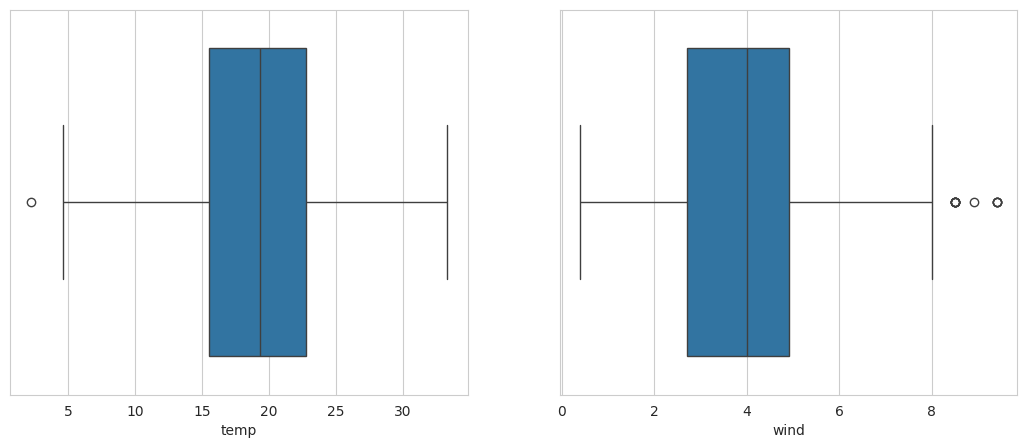

In [ ]:
plt.figure(figsize = (13, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for i, j in zip(["temp", "wind"], [ax1, ax2]):
    sns.boxplot(data = fires, x = i, ax = j)

plt.show()

In [ ]:
check1 = np.percentile(imputed_fires["temp"], [25, 50, 75])
IQR1 = check1[2] - check1[0]
lower_bound1 = check1[0] - 1.5 * IQR1
upper_bound1= check1[2] + 1.5 * IQR1
imputed_fires = imputed_fires[~(imputed_fires["temp"] < lower_bound1) | (imputed_fires["temp"] > upper_bound1)]

check2 = np.percentile(imputed_fires["wind"], [25, 50, 75])
IQR2 = check2[2] - check2[0]
lower_bound2 = check2[0] - 1.5 * IQR2
upper_bound2 = check2[2] + 1.5 * IQR2
imputed_fires = imputed_fires[~(imputed_fires["wind"] < lower_bound2) | (imputed_fires["wind"] > upper_bound2)]

imputed_fires

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,summer,log_area
0,7.0,5.0,86.2,26.200000,94.3,5.1,16.6,51.0,6.700000,0.0,0.00,0.0,0.000000
1,7.0,4.0,90.6,90.266667,669.1,6.7,18.0,33.0,0.900000,0.0,0.00,0.0,0.000000
2,7.0,4.0,90.6,43.700000,275.5,6.7,14.6,33.0,1.300000,0.0,0.00,0.0,0.000000
3,8.0,6.0,91.7,33.300000,77.5,9.0,8.3,97.0,4.000000,0.2,0.00,0.0,0.000000
4,8.0,6.0,89.3,51.300000,102.2,9.6,11.4,99.0,4.333333,0.0,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4.0,3.0,81.6,56.700000,665.6,1.9,27.8,32.0,2.700000,0.0,6.44,1.0,2.006871
513,2.0,4.0,81.6,56.700000,665.6,1.9,21.9,71.0,5.800000,0.0,54.29,1.0,4.012592
514,7.0,4.0,81.6,56.700000,665.6,1.9,21.2,70.0,6.700000,0.0,11.16,1.0,2.498152
515,1.0,4.0,94.4,146.000000,614.7,11.3,25.6,42.0,4.000000,0.0,0.00,1.0,0.000000


=> sau khi loại bỏ ngoại lệ của 2 đặc trưng **temp** và **wind** thì giờ tập dữ liệu còn lại 500 quan sát.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = imputed_fires.drop(["area", "X", "Y", "log_area"], axis = 1)
scaled = scaler.fit_transform(df)
final_df = pd.DataFrame(scaled, columns = df.columns)
final_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,summer
0,-0.844792,-1.370464,-1.874145,-0.887256,-0.463651,0.420895,1.589636,-0.073845,-0.918805
1,-0.033357,-0.349978,0.494837,-0.533379,-0.207158,-0.720229,-1.791351,-0.073845,-0.918805
2,-0.033357,-1.091716,-1.127347,-0.533379,-0.830071,-0.720229,-1.558180,-0.073845,-0.918805
3,0.169502,-1.257372,-1.943384,-0.024681,-1.984292,3.337098,0.015728,0.597353,-0.918805
4,-0.273099,-0.970659,-1.841586,0.108023,-1.416342,3.463890,0.210038,-0.073845,-0.918805
...,...,...,...,...,...,...,...,...,...
504,-1.693110,-0.884645,0.480412,-1.595010,1.588297,-0.783624,-0.742079,-0.073845,1.088370
505,-1.693110,-0.884645,0.480412,-1.595010,0.507360,1.688809,1.065000,-0.073845,1.088370
506,-1.693110,-0.884645,0.480412,-1.595010,0.379113,1.625413,1.589636,-0.073845,1.088370
507,0.667428,0.537770,0.270633,0.484017,1.185236,-0.149667,0.015728,-0.073845,1.088370


In [ ]:
imputed_fires["log_area"].reset_index(drop = True, inplace = True)
imputed_fires["area"].reset_index(drop = True, inplace = True)
imputed_fires["area"]


,area
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
...,...
504,6.44
505,54.29
506,11.16
507,0.00


# Subset Selection

#### forward

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = final_df
y = imputed_fires["log_area"]

model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

sfs_1_fw = SequentialFeatureSelector(model_1, n_features_to_select = 2, direction = "forward")
sfs_2_fw = SequentialFeatureSelector(model_2, n_features_to_select = 4, direction = "forward")
sfs_3_fw = SequentialFeatureSelector(model_3, n_features_to_select = 6, direction = "forward")

sfs_1_fw.fit(X, y)
sfs_2_fw.fit(X, y)
sfs_3_fw.fit(X, y)

print("Features selected in 2 feature model:", sfs_1_fw.get_feature_names_out())
print("Features selected in 4 feature model:", sfs_2_fw.get_feature_names_out())
print("Features selected in 6 feature model:", sfs_3_fw.get_feature_names_out())

Features selected in 2 feature model: ['DC' 'wind']
Features selected in 4 feature model: ['FFMC' 'DC' 'ISI' 'wind']
Features selected in 6 feature model: ['FFMC' 'DMC' 'DC' 'ISI' 'RH' 'wind']


=> Thật thú vị khi **temp** lại không có trong các đặc trưng được chú ý

In [ ]:
X2 = final_df[sfs_1_fw.get_feature_names_out()]
X4 = final_df[sfs_2_fw.get_feature_names_out()]
X6 = final_df[sfs_3_fw.get_feature_names_out()]

ln1 = LinearRegression().fit(X2, y)
ln2 = LinearRegression().fit(X4, y)
ln3 = LinearRegression().fit(X6, y)

MSE_1 = mean_squared_error(y, ln1.predict(X2))
MSE_2 = mean_squared_error(y, ln2.predict(X4))
MSE_3 = mean_squared_error(y, ln3.predict(X6))

r_1 = r2_score(y, ln1.predict(X2))
r_2 = r2_score(y, ln2.predict(X4))
r_3 = r2_score(y, ln3.predict(X6))

display(MSE_1, MSE_2, MSE_3)

1.9291967634220764

1.923720381562891

1.918686241418975

In [ ]:
display(r_1, r_2, r_3)

0.011258819649015095

0.014065544378274342

0.016645613846729468

=> 2,4 hoặc 6 đặc trưng vẫn không có sự khác biệt quá lớn

#### backward

In [ ]:
backward2 = SequentialFeatureSelector(model_1, n_features_to_select=2, direction="backward")
backward4 = SequentialFeatureSelector(model_2, n_features_to_select=4,  direction="backward")
backward6 = SequentialFeatureSelector(model_3, n_features_to_select=6,  direction="backward")

backward2.fit(X, y)
backward4.fit(X, y)
backward6.fit(X, y)

print("Features selected in 2 feature model:", backward2.get_feature_names_out())
print("Features selected in 4 feature model:", backward4.get_feature_names_out())
print("Features selected in 6 feature model:", backward6.get_feature_names_out())

Features selected in 2 feature model: ['DC' 'wind']
Features selected in 4 feature model: ['FFMC' 'DC' 'ISI' 'wind']
Features selected in 6 feature model: ['FFMC' 'DMC' 'DC' 'ISI' 'RH' 'wind']


=> Bị lỗi ở đâu mà cả backward và forward đều cho cùng kết quả, mà không chỉ đúng một lần, mà đúng tận cả 3 lần với n_features_to_select là 2, 4, 6.

In [ ]:
nl1 = LinearRegression().fit(final_df[backward2.get_feature_names_out()], y)
nl2 = LinearRegression().fit(final_df[backward4.get_feature_names_out()], y)
nl3 = LinearRegression().fit(final_df[backward6.get_feature_names_out()], y)

MSE_1_bw = mean_squared_error(y, nl1.predict(final_df[backward2.get_feature_names_out()]))
MSE_2_bw = mean_squared_error(y, nl2.predict(final_df[backward4.get_feature_names_out()]))
MSE_3_bw = mean_squared_error(y, nl3.predict(final_df[backward6.get_feature_names_out()]))

display(MSE_1_bw, MSE_2_bw, MSE_3_bw)

1.9291967634220764

1.923720381562891

1.918686241418975

# Developing Candidate Models

#### RidgeCV

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# X = final_df
# y = imputed_fires["log_area"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

ridge = RidgeCV(alphas = np.linspace(1, 10000, 10))

ridge.fit(X, y)

ridge_coef = ridge.coef_
best_alpha = ridge.alpha_

display(ridge_coef, best_alpha)
mean_squared_error(y, ridge.predict(X))

array([ 0.01915105,  0.03043373,  0.02855494, -0.00533087,  0.02983104,
       -0.01148764,  0.02242263,  0.00939639, -0.02584185])

1112.0

1.9255243072427384

#### Lasso

In [ ]:
lasso = LassoCV(alphas = np.linspace(1, 10000, 10))

lasso.fit(X, y)

lasso_coef = lasso.coef_
lasso_alpha = lasso.alpha_

display(lasso_coef, lasso_alpha)
mean_squared_error(y, lasso.predict(X))

array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.])

10000.0

1.951164573460212

=> Lasso có mô hình không tốt

#### Polynomial features

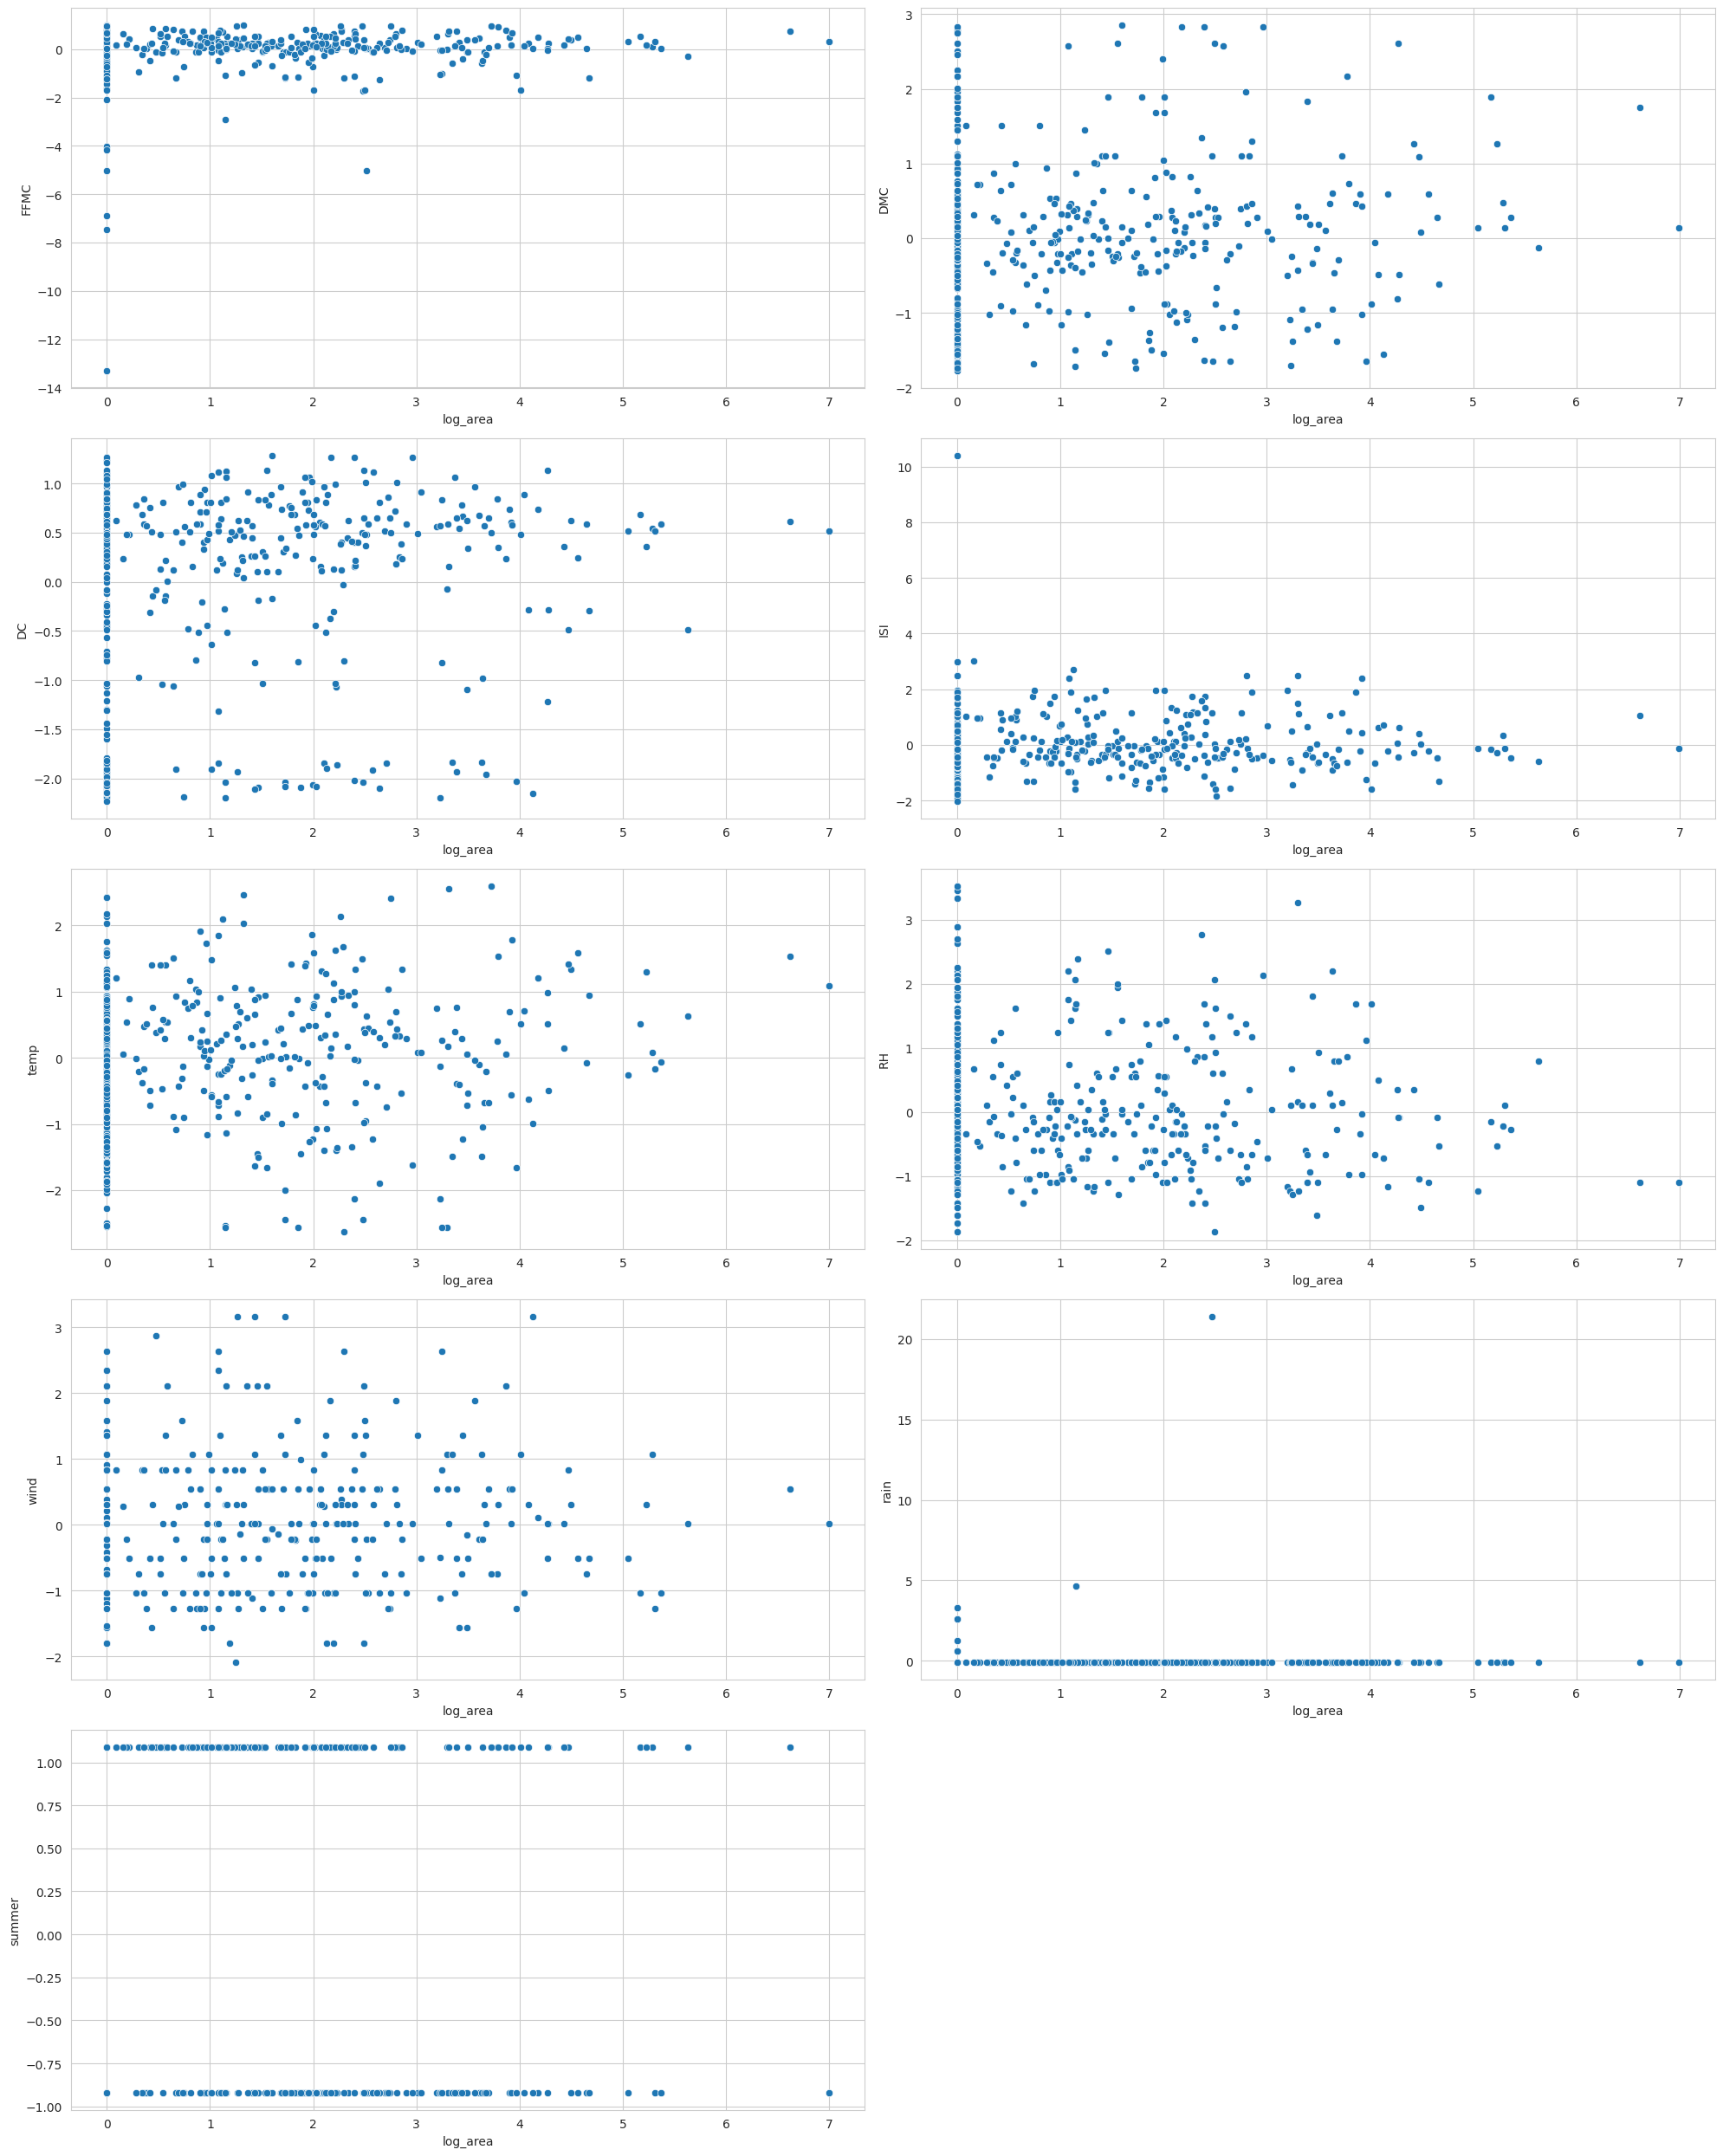

In [ ]:
fig = plt.figure(figsize=(20, 25))
for i, j in enumerate(final_df.columns):
    ax = fig.add_subplot(5, 2, i + 1)
    sns.scatterplot(data = final_df, y = j, x = imputed_fires["log_area"], ax = ax)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)
poly = PolynomialFeatures(degree = 2, include_bias= False)

X_subset_train = X_train[["temp", "wind", "rain", "summer"]]
X_subset_test = X_test[["temp", "wind", "rain", "summer"]]


md = LinearRegression()
quadratic = LinearRegression()

train_quad_X = poly.fit_transform(X_subset_train)
test_quad_X = poly.transform(X_subset_test)

md.fit(X_subset_train, y_train)
quadratic.fit(train_quad_X, y_train)

mse_md = mean_squared_error(y_test, md.predict(X_subset_test))
mse_poly = mean_squared_error(y_test, quadratic.predict(test_quad_X))

display(mse_md, mse_poly)

2.1395670382990755

131.6608834491886

=> Như dự đoán ban đầu, không có biến nào biểu diễn được mối quan hệ **phi tuyến** nên hệ MSE của polynomial là quá cao.

#### Spline transformer

In [ ]:
list_MSE = []
for i in range(2, 11):
    spline = SplineTransformer(degree = 1, n_knots = i, knots = "uniform")
    spline_x_train = spline.fit_transform(X_subset_train)
    spline_x_test = spline.transform(X_subset_test)

    md_ln = LinearRegression()
    md_ln.fit(spline_x_train, y_train)

    list_MSE.append(mean_squared_error(y_test, md_ln.predict(spline_x_test)))

list_MSE

[1.7938196577399708,
 1.7572535328315773,
 1.9088034001022438,
 1.874664587192065,
 1.380422480202278e+21,
 4.5145654703460136e+23,
 2.0262402735734769e+24,
 1.977849439460104,
 1.9936120457825837]

=> n_knots = 6 cho ra mô hình tốt nhất.

# K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

fw1_cvc = cross_val_score(ln1,final_df[sfs_1_fw.get_feature_names_out()] , y, cv = 5, scoring = "neg_mean_squared_error")
fw2_cvc = cross_val_score(ln2,final_df[sfs_2_fw.get_feature_names_out()] , y, cv = 5, scoring = "neg_mean_squared_error")
fw3_cvc = cross_val_score(ln3,final_df[sfs_3_fw.get_feature_names_out()] , y, cv = 5, scoring = "neg_mean_squared_error")

bw1_cvc = cross_val_score(nl1,final_df[backward2.get_feature_names_out()] , y, cv = 5, scoring = "neg_mean_squared_error")
bw2_cvc = cross_val_score(nl2,final_df[backward4.get_feature_names_out()] , y, cv = 5, scoring = "neg_mean_squared_error")
bw3_cvc = cross_val_score(nl3,final_df[backward6.get_feature_names_out()] , y, cv = 5, scoring = "neg_mean_squared_error")

ridge_csv = cross_val_score(ridge, X , y, cv = 5, scoring = "neg_mean_squared_error")

In [ ]:
print("Forward-2 Model, Avg Test MSE: ", np.mean(fw1_cvc), " std: ", np.std(fw1_cvc))
print("Forward-4 Model, Avg Test MSE: ", np.mean(fw2_cvc), " std: ", np.std(fw2_cvc))
print("Forward-6 Model, Avg Test MSE: ", np.mean(fw3_cvc), " std: ", np.std(fw3_cvc))
print("\n")
print("Backward-2 Model, Avg Test MSE: ", np.mean(bw1_cvc), " std: ", np.std(bw1_cvc))
print("Backward-4 Model, Avg Test MSE: ", np.mean(bw2_cvc), " std: ", np.std(bw2_cvc))
print("Backward-6 Model, Avg Test MSE: ", np.mean(bw3_cvc), " std: ", np.std(bw3_cvc))
print("\n")
print("Ridge Model, Avg Test MSE: ", np.mean(ridge_csv), " std: ", np.std(ridge_csv))

Forward-2 Model, Avg Test MSE:  -2.1629488899385865  std:  1.0678212157267155
Forward-4 Model, Avg Test MSE:  -2.1692838977807027  std:  1.0606004927840091
Forward-6 Model, Avg Test MSE:  -2.2335977148145636  std:  1.0835181290093208


Backward-2 Model, Avg Test MSE:  -2.1629488899385865  std:  1.0678212157267155
Backward-4 Model, Avg Test MSE:  -2.1692838977807027  std:  1.0606004927840091
Backward-6 Model, Avg Test MSE:  -2.2335977148145636  std:  1.0835181290093208


Ridge Model, Avg Test MSE:  -2.4499171164435922  std:  1.2359424653696802


=> Trong số các mô hình ứng cử viên của chúng ta, mô hình lựa chọn ngược sử dụng hai đặc trưng cho kết quả tốt nhất, với trung bình MSE là -2.16. Tuy nhiên, hãy lưu ý rằng đây là trên tỷ lệ log, vì vậy điều này cho thấy dự đoán sai số khoảng 2 lần. Trên bề mặt, điều này cho thấy tổng thể các mô hình không phải là dự đoán tốt.

# Examining Model Weaknesses

In [ ]:
imputed_fires

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,summer,log_area
0,7.0,5.0,86.2,26.200000,94.3,5.1,16.6,51.0,6.700000,0.0,0.00,0.0,0.000000
1,7.0,4.0,90.6,90.266667,669.1,6.7,18.0,33.0,0.900000,0.0,0.00,0.0,0.000000
2,7.0,4.0,90.6,43.700000,275.5,6.7,14.6,33.0,1.300000,0.0,0.00,0.0,0.000000
3,8.0,6.0,91.7,33.300000,77.5,9.0,8.3,97.0,4.000000,0.2,0.00,0.0,0.000000
4,8.0,6.0,89.3,51.300000,102.2,9.6,11.4,99.0,4.333333,0.0,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4.0,3.0,81.6,56.700000,665.6,1.9,27.8,32.0,2.700000,0.0,6.44,1.0,2.006871
513,2.0,4.0,81.6,56.700000,665.6,1.9,21.9,71.0,5.800000,0.0,54.29,1.0,4.012592
514,7.0,4.0,81.6,56.700000,665.6,1.9,21.2,70.0,6.700000,0.0,11.16,1.0,2.498152
515,1.0,4.0,94.4,146.000000,614.7,11.3,25.6,42.0,4.000000,0.0,0.00,1.0,0.000000


In [ ]:
final_df = pd.concat([final_df, imputed_fires["log_area"]], axis = 1)

In [ ]:
X = imputed_fires.drop(["log_area"], axis = 1)
y = imputed_fires["log_area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)

X_subset_train = X_train[['temp', 'wind']]
X_subset_test = X_test[['temp', 'wind']]

scalerr = StandardScaler()
scaledd_train = scalerr.fit_transform(X_subset_train)
scaledd_test = scalerr.transform(X_subset_test)

model_linear = LinearRegression()
model_linear.fit(scaledd_train, y_train)

mse_model_linear = mean_squared_error(y_test, model_linear.predict(scaledd_test))
r2_model_linear = r2_score(y_test, model_linear.predict(scaledd_test))

display(mse_model_linear, r2_model_linear)

1.6430682644095633

-0.01699871489494731

In [ ]:
residual = y_test - np.exp(model_linear.predict(scaledd_test))
residual

,log_area
493,-0.259936
324,-0.836362
408,-0.957906
33,-2.997009
389,-3.442004
...,...
166,-1.606934
60,-2.716188
345,-0.953578
328,-2.983224


In [ ]:
residual.mean()

-2.245158963710172

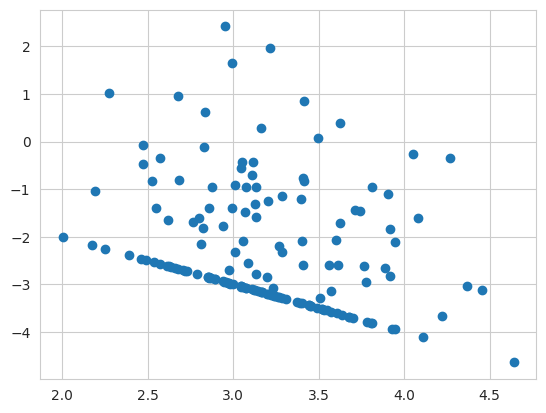

In [ ]:
plt.scatter(np.exp(model_linear.predict(scaledd_test)), residual)

Text(0, 0.5, 'predict')

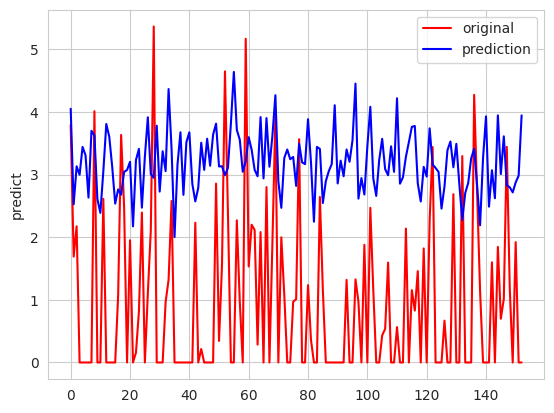

In [ ]:
sns.lineplot(x = range(len(y_test)), y = y_test, color = "red", label = "original")
sns.lineplot(x = range(len(y_test)), y = np.exp(model_linear.predict(scaledd_test)), color = "blue", label = "prediction")

plt.ylabel("predict")

Text(0, 0.5, 'predict')

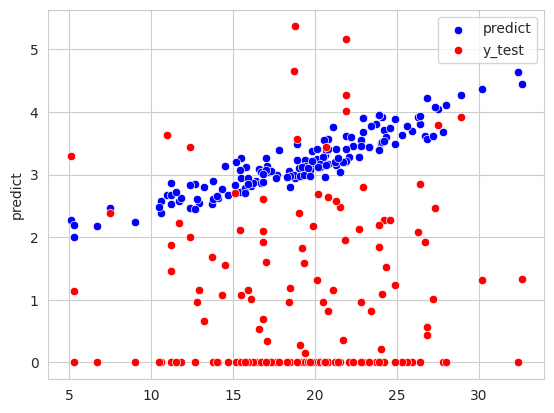

In [ ]:
sns.scatterplot(x = np.array(X_test["temp"]), y =  np.exp(model_linear.predict(scaledd_test)),
                color = "blue", label = "predict")
sns.scatterplot(x = np.array(X_test["temp"]), y = y_test, color = "red", label = "y_test")

plt.ylabel("predict")

Text(0, 0.5, 'predict')

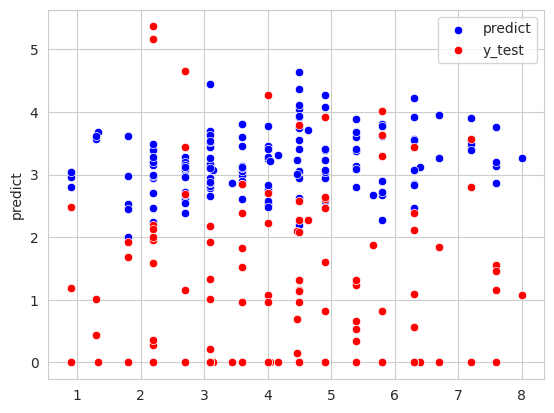

In [ ]:
sns.scatterplot(x = np.array(X_test["wind"]), y =  np.exp(model_linear.predict(scaledd_test)),
                color = "blue", label = "predict")
sns.scatterplot(x = np.array(X_test["wind"]), y = y_test, color = "red", label = "y_test")

plt.ylabel("predict")

=> Giá trị dự đoán đều cao hơn so với giạs trị thực tế, nhưng không đến mức là quá cao.